### Análise de Dados com Pandas
* Projeto Final - Trilha DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY) - Turma 890
* Grupo 3

Integrantes: 
- Carlos Henrique
- Daniel Arnóbio
- Laila Souza
- Taiara Sampaio
- Victor Hugo



#### Dataset: Home Credit Default Risk (Kaggle)
*Dados estáticos das requisições de financiamento. Cada linha representa um empréstimo no dataset.*


Disponível para download em: [https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_train.csv](https://www.kaggle.com/competitions/home-credit-default-risk/data?select=application_train.csv)


------
Considerando os temas estudados neste módulo e o dataset **home_credit_default_risk_application_100000** (*que é um recorte das 100.000 primeiras linhas do dataset supracitado*), responda apenas 12 das perguntas a seguir.

Observações e/ou recomendações de tratamento:
- Necessário fatiar de acordo com as colunas listadas na lista **selected_columns** informada abaixo
- Juntar/Tratar os vários tipos de Industry no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Trade no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Transport no campo ORGANIZATION_TYPE;
- Juntar/Tratar os vários tipos de Business Entity no campo ORGANIZATION_TYPE;
- Algumas colunas apresentam outliers que PRECISAM ser desconsiderados ou zerados, como o valor 365243 em DAYS_EMPLOYED.
- As colunas que contam dias levam em consideração DATADACOLUNA - HOJE, gerando, muitas vezes, números negativos que não devem prejudicar a análise.
- Preferencialmente, sempre ordene os resultados de forma ascendente ou descendente.

Glossário de apoio:
- block of flats = apartamentos
- AMT = amount / valor
- QRT = Quarter / Trimestre
-  CNT = count / qty / quantidade
- 0 = Não / False / No
- 1 = Sim / True / Yes






---
##### Perguntas - **Escolham 12 dentre todas abaixo**:

- 01) Qual é a idade, em anos, do titular mais jovem?
- 02) Qual a média do valor de anuidade dos residentes em apartamentos maiores de 50 anos?
- 03) Existe uma correlação forte entre ter imóvel próprio e ter carro próprio? Por que?
- 04) Quais os 3 principais tipos de ocupação de quem mora com parentes?
- 05) Qual é a diferença entre a média de valor de crédito e a média de valor de anuidade quando filtramos pelos trabalhadores do tipo de organização Military?
- 06) Considerando os tipos de ocupação, podemos dizer que os "Managers" possuem um valor de anuidade mais alto? Se não, qual é? 
- 07) Qual é o horário e dia da semana que mais trabalhadores dos tipos de organização Bank & Government optam por requisitar o financiamento?
- 08) Qual a média de requisições de empréstimo entre trabalhadores com tipo de ocupação "Sales staff", que não moram com parentes, declararam não estarem em situação de emergência e possuem telefone de trabalho?
- 09) Como você explica a correlação entre o número de filhos e idade (em anos)?
- 10) Podemos concluir que, quanto mais tempo empregado, maior o crédito? Por que?
- 11) Qual o desvio padrão da quantidade de filhos de quem tem 8 familiares?
- 12) Quantos registros existem em que o número de filhos é maior que o número de familiares?
- 13) Qual a média de dias por estado civil em que o telefone foi alterado de quem tem até 3 filhos, até 40 anos de idade e tem seu próprio imóvel?
- 14) Qual a quantidade de requisições por escolaridade x possuir o seu próprio carro x possuir sua própria casa?
- 15) Quais os 3 tipos de organização em que seus empregados mais requisitaram análise de crédito pelo Bureau no último trimestre (com exceção do tipo Other)?
- 16) Qual gênero requisitou mais análise de crédito na última semana?
- 17) Existe alguma inconsistência no campo que indica o tempo de posse do carro? Ou seja, existem registros em que o requisitante informou não ter carro e informou o tempo ou vice-versa?
- 18) Qual a média de idade (em anos) por tipo de ocupação e escolaridade?
- 19) Qual a média de valor de anuidade contratada considerando o número de filhos e escolaridade dos requisitantes que solicitaram financiamento em dia útil dentro do horário comercial padrão (8h às 18h)?
- 20) Quais a média de crédito, média de filhos e média de idade (em anos) de quem declarou estado de emergência?
- 21) Quais os tipos de ocupação e tipo de organização dos requisitantes com idade maior que 60 anos?
- 22) Ao analisar correlações, quantidades e agrupamentos entre colunas de marcadores como possuir carro, possuir casa, tipo de moradia, estado civil, escolaridade ou afins, o que chama sua atenção?
- 23) Quais as 10 colunas que você julga serem mais importantes ao avaliar o risco de inadimplência? Por que?
- 24) Considerando a quantidade de campos nulos, quais colunas podem ter seu valor substituído por 0 ou N (Não, No, False) sem prejuízo para a análise feita aqui?

___
___
___

In [ ]:
#listando as colunas que serão utilizadas para correlação

selected_columns = ['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 #'NAME_TYPE_SUITE',
 #'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 #'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 #'DAYS_REGISTRATION',
 #'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 #'FLAG_MOBIL',
 #'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 #'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 #'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 #'REG_REGION_NOT_LIVE_REGION',
 #'REG_REGION_NOT_WORK_REGION',
 #'LIVE_REGION_NOT_WORK_REGION',
 #'REG_CITY_NOT_LIVE_CITY',
 #'REG_CITY_NOT_WORK_CITY',
 #'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
#  'EXT_SOURCE_1',
#  'EXT_SOURCE_2',
#  'EXT_SOURCE_3',
#  'APARTMENTS_AVG',
#  'BASEMENTAREA_AVG',
#  'YEARS_BEGINEXPLUATATION_AVG',
#  'YEARS_BUILD_AVG',
#  'COMMONAREA_AVG',
#  'ELEVATORS_AVG',
#  'ENTRANCES_AVG',
#  'FLOORSMAX_AVG',
#  'FLOORSMIN_AVG',
#  'LANDAREA_AVG',
#  'LIVINGAPARTMENTS_AVG',
#  'LIVINGAREA_AVG',
#  'NONLIVINGAPARTMENTS_AVG',
#  'NONLIVINGAREA_AVG',
#  'APARTMENTS_MODE',
#  'BASEMENTAREA_MODE',
#  'YEARS_BEGINEXPLUATATION_MODE',
#  'YEARS_BUILD_MODE',
#  'COMMONAREA_MODE',
#  'ELEVATORS_MODE',
#  'ENTRANCES_MODE',
#  'FLOORSMAX_MODE',
#  'FLOORSMIN_MODE',
#  'LANDAREA_MODE',
#  'LIVINGAPARTMENTS_MODE',
#  'LIVINGAREA_MODE',
#  'NONLIVINGAPARTMENTS_MODE',
#  'NONLIVINGAREA_MODE',
#  'APARTMENTS_MEDI',
#  'BASEMENTAREA_MEDI',
#  'YEARS_BEGINEXPLUATATION_MEDI',
#  'YEARS_BUILD_MEDI',
#  'COMMONAREA_MEDI',
#  'ELEVATORS_MEDI',
#  'ENTRANCES_MEDI',
#  'FLOORSMAX_MEDI',
#  'FLOORSMIN_MEDI',
#  'LANDAREA_MEDI',
#  'LIVINGAPARTMENTS_MEDI',
#  'LIVINGAREA_MEDI',
#  'NONLIVINGAPARTMENTS_MEDI',
#  'NONLIVINGAREA_MEDI',
#  'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 #'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
#  'OBS_30_CNT_SOCIAL_CIRCLE',
#  'DEF_30_CNT_SOCIAL_CIRCLE',
#  'OBS_60_CNT_SOCIAL_CIRCLE',
#  'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
#  'FLAG_DOCUMENT_2',
#  'FLAG_DOCUMENT_3',
#  'FLAG_DOCUMENT_4',
#  'FLAG_DOCUMENT_5',
#  'FLAG_DOCUMENT_6',
#  'FLAG_DOCUMENT_7',
#  'FLAG_DOCUMENT_8',
#  'FLAG_DOCUMENT_9',
#  'FLAG_DOCUMENT_10',
#  'FLAG_DOCUMENT_11',
#  'FLAG_DOCUMENT_12',
#  'FLAG_DOCUMENT_13',
#  'FLAG_DOCUMENT_14',
#  'FLAG_DOCUMENT_15',
#  'FLAG_DOCUMENT_16',
#  'FLAG_DOCUMENT_17',
#  'FLAG_DOCUMENT_18',
#  'FLAG_DOCUMENT_19',
#  'FLAG_DOCUMENT_20',
#  'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [ ]:
#Importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sb


In [ ]:
#Importando os dados e filtrando as colunas

df = pd.read_csv("/content/home_credit_default_risk_application_100000.csv")
df = df[selected_columns]
df.info()

In [ ]:
#Colunas com valores nulos

colunas_nulos = df.isnull().sum().sort_values(ascending=False)
colunas_nulos = colunas_nulos[colunas_nulos>0]
colunas_nulos = pd.DataFrame(colunas_nulos)
colunas_nulos['proporçao %'] = (colunas_nulos/len(df))*100
colunas_nulos

,0,proporçao %
OWN_CAR_AGE,66019,66.019
WALLSMATERIAL_MODE,50765,50.765
HOUSETYPE_MODE,50105,50.105
EMERGENCYSTATE_MODE,47333,47.333
OCCUPATION_TYPE,31224,31.224
AMT_REQ_CREDIT_BUREAU_YEAR,13437,13.437
AMT_REQ_CREDIT_BUREAU_QRT,13437,13.437
AMT_REQ_CREDIT_BUREAU_MON,13437,13.437
AMT_REQ_CREDIT_BUREAU_WEEK,13437,13.437
AMT_REQ_CREDIT_BUREAU_DAY,13437,13.437


In [ ]:
# Fazendo o tratamento dos types

def tratar_ORGANIZATION_TYPE(x):
    for i in range(14):
        x = str(x).replace(' Type '+str(i),'').replace(': type '+(str(i)) if (i < 10) else str(i-10),'')
    return x

df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: tratar_ORGANIZATION_TYPE(x))

01) Qual é a idade, em anos, do titular mais jovem?


<AxesSubplot:>

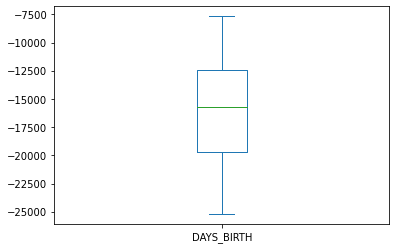

In [ ]:
#Aparentemente todos os valores estão negativos e em dias

df.DAYS_BIRTH.plot(kind='box')

In [ ]:
#Tratando a coluna DAYS_BIRTH

df.rename(columns = {'DAYS_BIRTH':'YEARS_BIRTH'}, inplace=True)
df['YEARS_BIRTH']= df.YEARS_BIRTH.apply(lambda x: round((x/365)*(-1), 0))

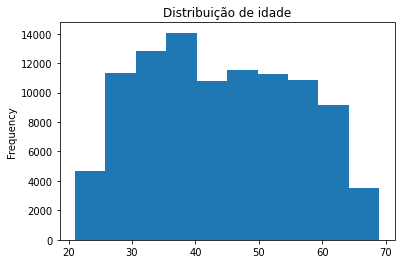

In [ ]:
df.YEARS_BIRTH.plot(kind='hist', title='Distribuição de idade')

In [ ]:
print(f'A idade, em anos, do titular mais novo é {df.YEARS_BIRTH.min()} anos')

A idade, em anos, do titular mais novo é 21.0 anos


02) Qual a média do valor de anuidade dos residentes em apartamentos maiores de 50 anos?

In [ ]:
filtro = (df.YEARS_BIRTH>50) & (df.HOUSETYPE_MODE=='block of flats') 

media = df[filtro]['AMT_ANNUITY'].mean()

print(f'A média do valor da anuidade dos residentes em apartamentos maiores de 50 anos é ${media:.2f}')

A média do valor da anuidade dos residentes em apartamentos maiores de 50 anos é $27198.43


03) Existe uma correlação forte entre ter imóvel próprio e ter carro próprio? Por que?


In [ ]:
#Antes de tudo, precisamos deixar as colunas com valores numéricos para calcular a correlação entre elas

df['FLAG_OWN_CAR']= df['FLAG_OWN_CAR'].apply(lambda x: 1 if (x=='Y') else 0)  
df['FLAG_OWN_REALTY']= df['FLAG_OWN_REALTY'].apply(lambda x: 1 if (x=='Y') else 0) 

In [ ]:
colunas = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR']
df[colunas].corr()

,FLAG_OWN_REALTY,FLAG_OWN_CAR
FLAG_OWN_REALTY,1.00000,0.00247
FLAG_OWN_CAR,0.00247,1.00000


04) Quais os 3 principais tipos de ocupação de quem mora com parentes?


In [ ]:
colunas = ['OCCUPATION_TYPE']
filtros = (df['NAME_HOUSING_TYPE'] == 'With parents')
df[filtros].groupby(colunas)['OCCUPATION_TYPE'].count().sort_values(ascending= False)[0:3]

OCCUPATION_TYPE
Laborers       1100
Sales staff     715
Core staff      576
Name: OCCUPATION_TYPE, dtype: int64

05) Qual é a diferença entre a média de valor de crédito e a média de valor de anuidade quando filtramos pelos trabalhadores do tipo de organização Military?

In [ ]:
filtros = (df.OCCUPATION_TYPE == 'Military')

diferenca_medias = df[['AMT_CREDIT', 'AMT_ANNUITY']].mean()[0] - df[['AMT_CREDIT', 'AMT_ANNUITY']].mean()[1]

print(f'A diferença entre as médias é ${diferenca_medias:.2f}')

A diferença entre as médias é $571918.12


In [ ]:
df[['AMT_CREDIT', 'AMT_ANNUITY']].mean()

AMT_CREDIT     599003.446500
AMT_ANNUITY     27085.325928
dtype: float64

06) Considerando os tipos de ocupação, podemos dizer que os "Managers" possuem um valor de anuidade mais alto? Se não, qual é? 

In [ ]:
colunas = ['OCCUPATION_TYPE']
df.groupby(colunas)['AMT_ANNUITY'].max().sort_values(ascending= False)[0:3]

OCCUPATION_TYPE
Managers                 258025.5
Accountants              225000.0
High skill tech staff    225000.0
Name: AMT_ANNUITY, dtype: float64

07) Qual é o horário e dia da semana que mais trabalhadores dos tipos de organização Bank & Government optam por requisitar o financiamento?

In [ ]:
## Primeiramente precisamos tratar os tipos de organizações somando todos os types e uma única tipificação
df['ORGANIZATION_TYPE'].value_counts().sort_values(ascending =False)

Business Entity        27673
XNA                    17865
Self-employed          12362
Other                   5428
Industry                4779
Trade                   4556
Medicine                3654
Government              3394
School                  2914
Transport               2895
Kindergarten            2216
Construction            2100
Security                1091
Housing                  986
Military                 872
Bank                     866
Agriculture              764
Postal                   734
Police                   720
Security Ministries      682
Restaurant               584
Services                 544
University               419
Hotel                    319
Electricity              303
Telecom                  192
Insurance                191
Emergency                185
Advertising              142
Culture                  126
Realtor                  125
Mobile                   111
Legal Services            96
Cleaning                  84
Religion      

In [ ]:
# Calculando a moda para saber o dia que da semana que mais trabalhadores dos tipos 
# de organização Bank & Government optam por requisitar o financiamento

filtros =  (df['ORGANIZATION_TYPE']=='Bank') | (df['ORGANIZATION_TYPE']=='Government')
df[filtros][['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']].mode()

,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,TUESDAY,10
1,NaN,11


08) Qual a média de requisições de empréstimo entre trabalhadores com tipo de ocupação "Sales staff", que não moram com parentes, declararam não estarem em situação de emergência e possuem telefone de trabalho?

In [ ]:
colunas = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'EMERGENCYSTATE_MODE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'OCCUPATION_TYPE']
 
filtros = (df.OCCUPATION_TYPE == 'Sales staff') & (df.NAME_HOUSING_TYPE== 'With parents') & (df.EMERGENCYSTATE_MODE == 'No') &  (df.FLAG_WORK_PHONE == 1)
media = df[filtros]['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()
print(f'Média: {media:.2f}')

Média: 1.64


<AxesSubplot:ylabel='Frequency'>

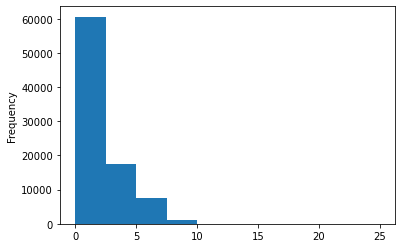

In [ ]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.plot(kind='hist')

09) Como você explica a correlação entre o número de filhos e idade (em anos)?

In [ ]:
df[['CNT_CHILDREN','YEARS_BIRTH']].corr()

,CNT_CHILDREN,YEARS_BIRTH
CNT_CHILDREN,1.00000,-0.32974
YEARS_BIRTH,-0.32974,1.00000


In [ ]:
df.groupby('CNT_CHILDREN')['YEARS_BIRTH'].describe()

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,,,,,,,,
0,69966.0,46.796630,12.441264,21.0,37.00,48.0,57.00,69.0
1,20025.0,37.451436,7.807701,21.0,31.00,37.0,43.00,69.0
2,8587.0,36.505532,5.934561,21.0,32.00,36.0,40.00,68.0
3,1227.0,37.326813,5.633299,23.0,33.00,37.0,40.00,65.0
4,149.0,38.261745,6.274569,23.0,34.00,37.0,41.00,61.0
5,31.0,41.612903,8.040221,30.0,35.50,39.0,45.50,60.0
6,9.0,41.111111,3.655285,35.0,41.00,41.0,43.00,46.0
7,2.0,44.500000,4.949747,41.0,42.75,44.5,46.25,48.0
8,1.0,42.000000,NaN,42.0,42.00,42.0,42.00,42.0


18) Qual a média de idade (em anos) por tipo de ocupação e escolaridade?

In [ ]:
colunas = ['OCCUPATION_TYPE','NAME_EDUCATION_TYPE']
df.groupby(colunas)['YEARS_BIRTH'].mean()

OCCUPATION_TYPE       NAME_EDUCATION_TYPE          
Accountants           Academic degree                  53.000000
                      Higher education                 39.045314
                      Incomplete higher                33.266667
                      Lower secondary                  38.142857
                      Secondary / secondary special    43.196413
                                                         ...    
Security staff        Secondary / secondary special    45.394450
Waiters/barmen staff  Higher education                 31.698413
                      Incomplete higher                25.942857
                      Lower secondary                  34.333333
                      Secondary / secondary special    37.369369
Name: YEARS_BIRTH, Length: 80, dtype: float64

20) Quais a média de crédito, média de filhos e média de idade (em anos) de quem declarou estado de emergência?

In [ ]:
colunas = ['AMT_CREDIT', 'CNT_CHILDREN', 'YEARS_BIRTH']

filtro = (df.EMERGENCYSTATE_MODE == 'Yes')
media_credito = df[filtro]['AMT_CREDIT'].mean()
media_filhos = df[filtro]['CNT_CHILDREN'].mean()
media_idade = df[filtro]['YEARS_BIRTH'].mean()

print(f'Média de Crédito: R$ {media_credito:.2f}')
print(f'Média de Filhos: {media_filhos:.2f}')
print(f'Média de Idade: {media_idade:.2f}')


Média de Crédito: R$ 578353.82
Média de Filhos: 0.49
Média de Idade: 43.19


21) Quais os tipos de ocupação e tipo de organização dos requisitantes com idade maior que 60 anos?

In [ ]:
colunas = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'YEARS_BIRTH']

filtro = (df.YEARS_BIRTH > 60)
tipos_ocupacao = df[filtro]['OCCUPATION_TYPE'].unique()
tipos_organizacao = df[filtro]['ORGANIZATION_TYPE'].unique()

print(f"Tipos de ocupação: \n{tipos_ocupacao[1:]}")
print(f"\nTipos de organização: \n{tipos_organizacao}")

Tipos de ocupação: 
['Security staff' 'Cleaning staff' 'Core staff' 'Laborers'
 'Medicine staff' 'Managers' 'Sales staff' 'Cooking staff' 'Drivers'
 'Accountants' 'High skill tech staff' 'Private service staff'
 'Secretaries' 'Waiters/barmen staff' 'IT staff' 'Realty agents'
 'Low-skill Laborers' 'HR staff']

Tipos de organização: 
['XNA' 'Medicine' 'Business Entity' 'Government' 'Bank' 'Other'
 'Electricity' 'Self-employed' 'Housing' 'Construction' 'Agriculture'
 'Cleaning' 'Industry' 'Kindergarten' 'School' 'Security' 'Transport'
 'Trade' 'Postal' 'University' 'Restaurant' 'Advertising' 'Legal Services'
 'Security Ministries' 'Insurance' 'Hotel' 'Police' 'Emergency' 'Mobile'
 'Culture' 'Realtor' 'Military' 'Religion' 'Services' 'Telecom']
